# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [39]:
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import graphviz

Define the matrix containing the data (one example per row) and the vector containing the corresponding target value

In [40]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [42]:
print(clf.predict([[0, 1, 1]]))

[0]


In [43]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


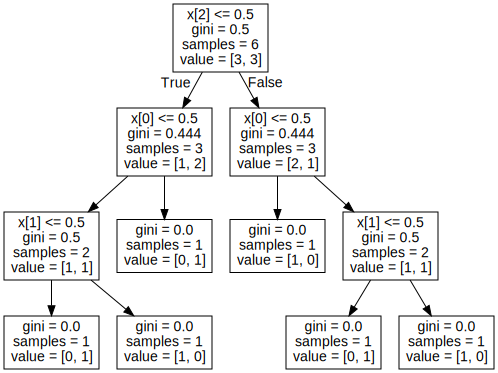

In [46]:
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [10]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements except the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [11]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [12]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
[f'{i} - {iris.target_names[i]}' for i in range(len(iris.target_names))]

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]


['0 - setosa', '1 - versicolor', '2 - virginica']

Print the index of the test instances and the corresponding predictions

In [13]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [14]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if j<len(iris.feature_names)-1: s= s + ", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

In [15]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris_X_train, iris_y_train)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.96666667 1.         0.86666667 0.86666667 1.        ]
0.94 accuracy with a standard deviation of 0.06


In [17]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [19]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


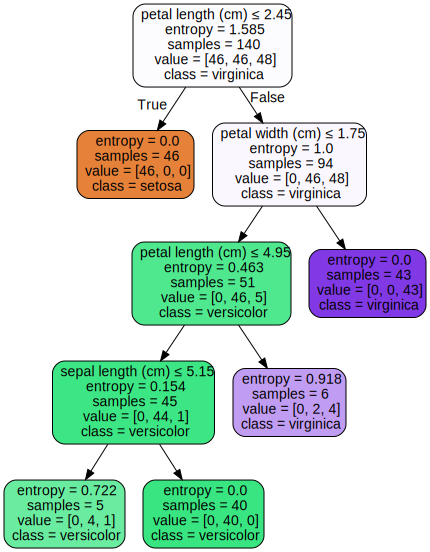

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [21]:
clf_class = clf

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 


### Esercizio 1

"get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions."

Suddivisione del test set nelle classi di appartenenza, **artificial inlfation** con fattore 10 sulle istanze della classe *virginica* e creazione dei set di test e training dopo l'inflation

In [22]:
setosa_indexes = [i for i in range(len(iris_y_train)) if iris_y_train[i] == 0]
versicolor_indexes = [i for i in range(len(iris_y_train)) if iris_y_train[i] == 1]
virginica_indexes = [i for i in range(len(iris_y_train)) if iris_y_train[i] == 2]

iris_X_train_versicolor = iris_X_train[versicolor_indexes].repeat(10, axis=0)
iris_Y_train_versicolor = iris_y_train[versicolor_indexes].repeat(10, axis=0)

iris_X_train_infl = np.concatenate((iris_X_train[setosa_indexes], iris_X_train[virginica_indexes], iris_X_train_versicolor))
iris_Y_train_infl = np.concatenate((iris_y_train[setosa_indexes], iris_y_train[virginica_indexes], iris_Y_train_versicolor))

Addestramento del modello dopo **artificial inflation** sulle istanze della classe *versicolor* e visualizzazione dell'albero appreso

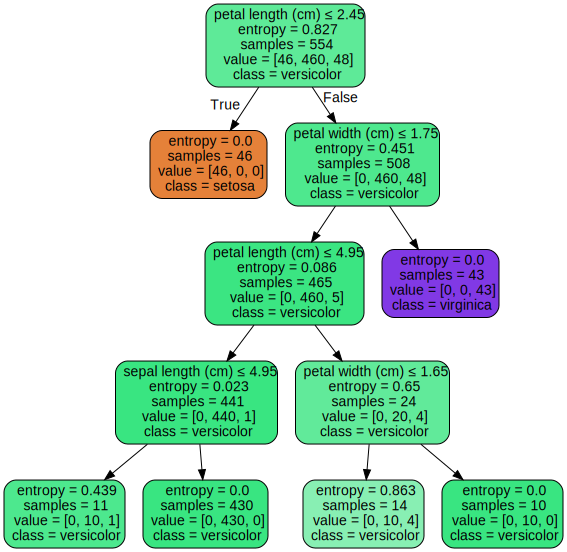

In [23]:
clf_inflation = tree.DecisionTreeClassifier(criterion='entropy', random_state=300, min_samples_leaf=5)
clf_inflation = clf_inflation.fit(iris_X_train_infl, iris_Y_train_infl)

dot_data_inflation = tree.export_graphviz(clf_inflation, out_file=None, 
                                          feature_names=iris.feature_names, 
                                          class_names=iris.target_names, 
                                          filled=True, rounded=True, 
                                          special_characters=True)
graph_inflation = graphviz.Source(dot_data_inflation)
graph_inflation 

Accuratezza rispetto al test set

In [24]:
predicted_Y_test_inflation = clf_inflation.predict(iris_X_test)
print("%0.2f accuracy" %accuracy_score(iris_y_test, predicted_Y_test_inflation))

0.90 accuracy


Valutazione tramite cross-validation

In [25]:
scores = cross_val_score(clf_inflation, iris.data, iris.target, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.06


#### Esercizio 1.b
Modifica del peso per l'errata predizione di *versicolor* e visualizzazione dell'albero

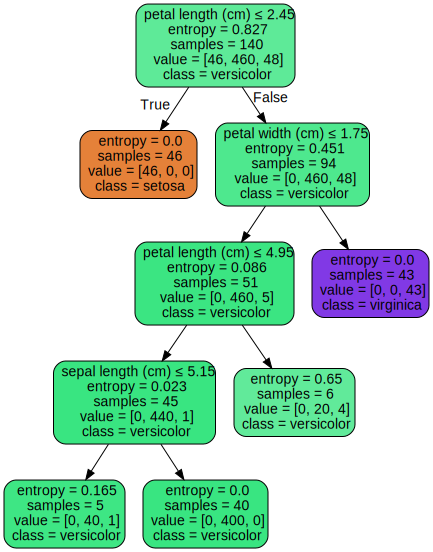

In [26]:
clf_w = tree.DecisionTreeClassifier(
    criterion = "entropy", random_state = 300, min_samples_leaf = 5, class_weight = {0:1, 1:10, 2:1})
clf_w = clf_w.fit(iris_X_train, iris_y_train)

dot_data_w = tree.export_graphviz(clf_w, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph_w = graphviz.Source(dot_data_w)
graph_w

Accuratezza rispetto al test set

In [27]:
predicted_y_test_w = clf_w.predict(iris_X_test)
print("%0.2f accuracy" %accuracy_score(iris_y_test, predicted_y_test_w))

0.90 accuracy


Valutazione tramite cross-validation

In [28]:
scores = cross_val_score(clf_w, iris.data, iris.target, cv = 5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.02


### Esercizio 2

"learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc."

In [29]:
clfs = [] # Classifiers
cvs = [] # Cross validations scores for each classifier

clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300)) # basic
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=10))
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, max_depth=3))
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_split=10))
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_impurity_decrease=0.05))
clfs.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_impurity_decrease=0.44))

for clf in clfs:
    cvs.append(cross_val_score(clf, iris.data, iris.target, cv=10))

for score in cvs:
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.96 accuracy with a standard deviation of 0.04
0.95 accuracy with a standard deviation of 0.05
0.96 accuracy with a standard deviation of 0.03
0.96 accuracy with a standard deviation of 0.03
0.96 accuracy with a standard deviation of 0.04
0.95 accuracy with a standard deviation of 0.05


Il migliore modello in fatto di bilanciamento accuratezza media / standard deviation

In [30]:
clf_best = clfs[2]
clf_best

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=300)

### Esercizio 3

"build the confusion matrix of the created tree models on the test set and show them."


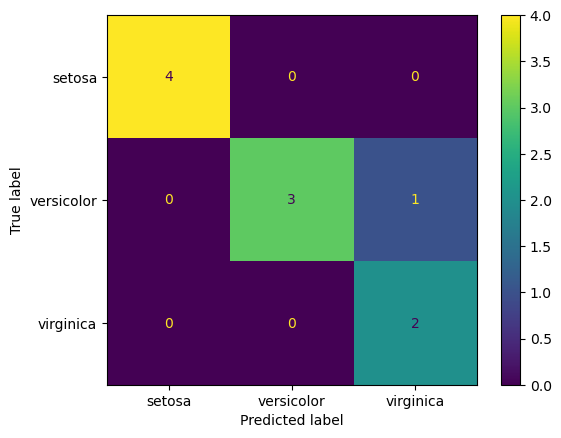

In [31]:
clf_best.fit(iris_X_train, iris_y_train)
predected_Y_test_best = clf_best.predict(iris_X_test)

metrics.ConfusionMatrixDisplay.from_predictions(
    iris_y_test, predected_Y_test_best, display_labels=iris.target_names, colorbar=True)

### Esercizio 4

"build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class."

In [32]:
def roc_plots(c):
    iris_plot_fig, iris_plot_axes = plt.subplots(1,3, figsize=(18,6))
    predicted_y_test_prob = c.predict_proba(iris_X_test)
    for l in range(0, 3):
        # Trasformo in un problema binario per classe l
        roc_test = [1 if iris_y_test[i] == l else -1 for i in range(len(iris_y_test))] 
        # Prendo le predizioni sul test set per classe l
        prob_test = predicted_y_test_prob[:, l]
        # Stampo il ROC plot
        metrics.RocCurveDisplay.from_predictions(roc_test, prob_test, name='ROC curve ' + iris.target_names[l] + ' vs rest', color='purple', ax=iris_plot_axes[l])

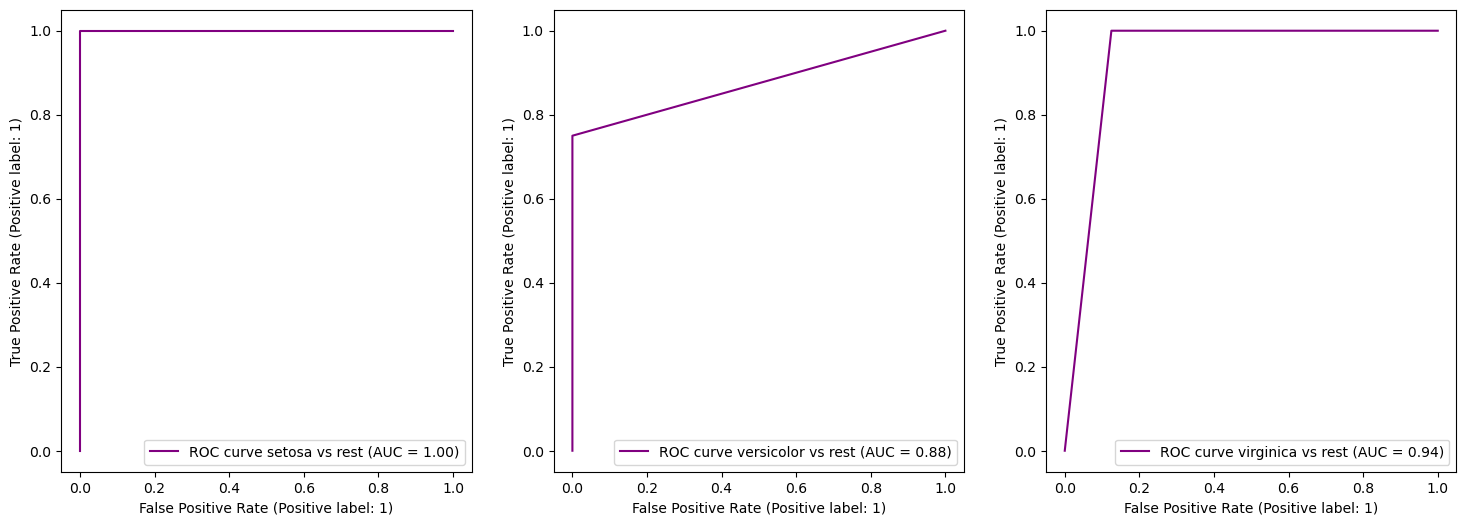

In [33]:
roc_plots(clf_class)

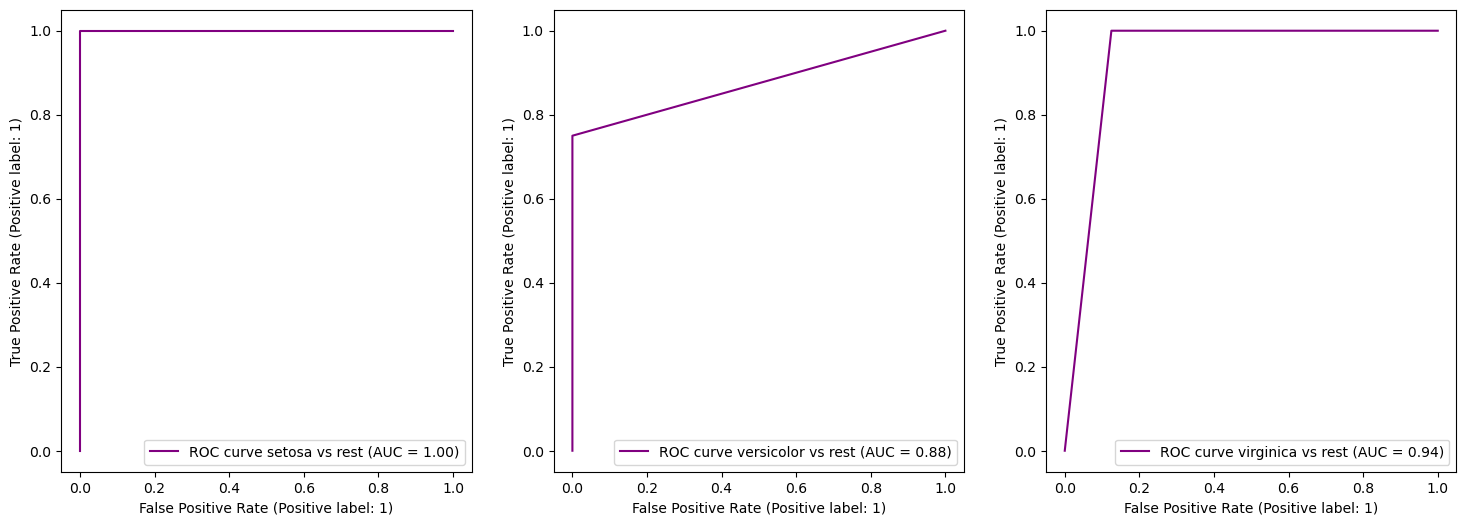

In [34]:
roc_plots(clf_inflation)

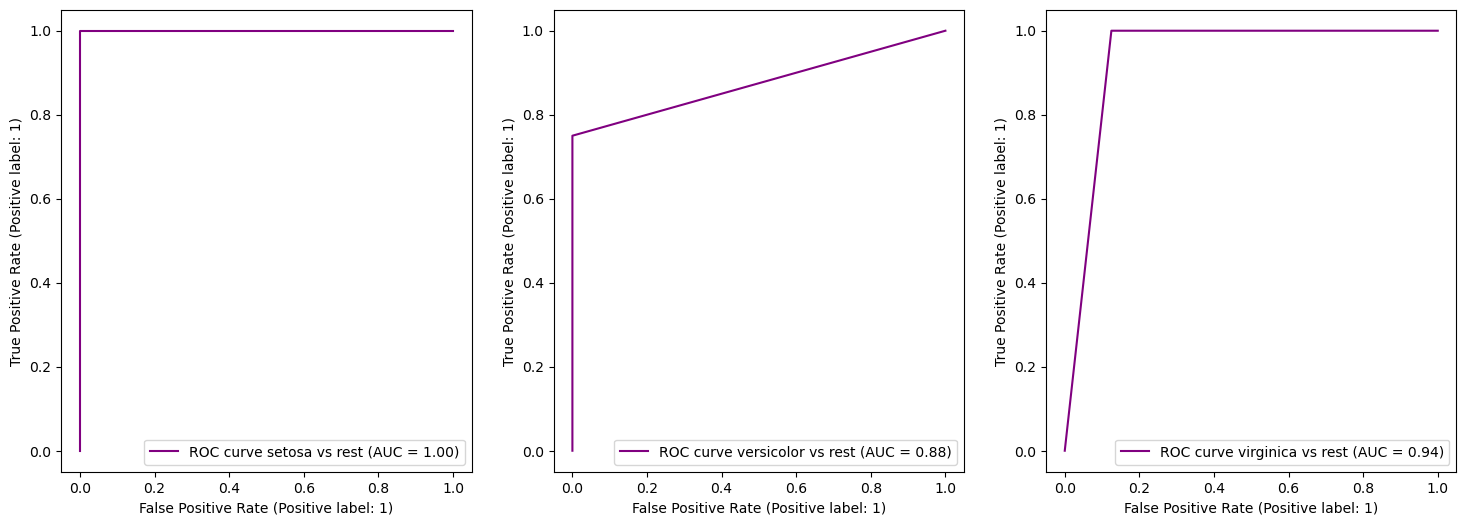

In [35]:
roc_plots(clf_w)

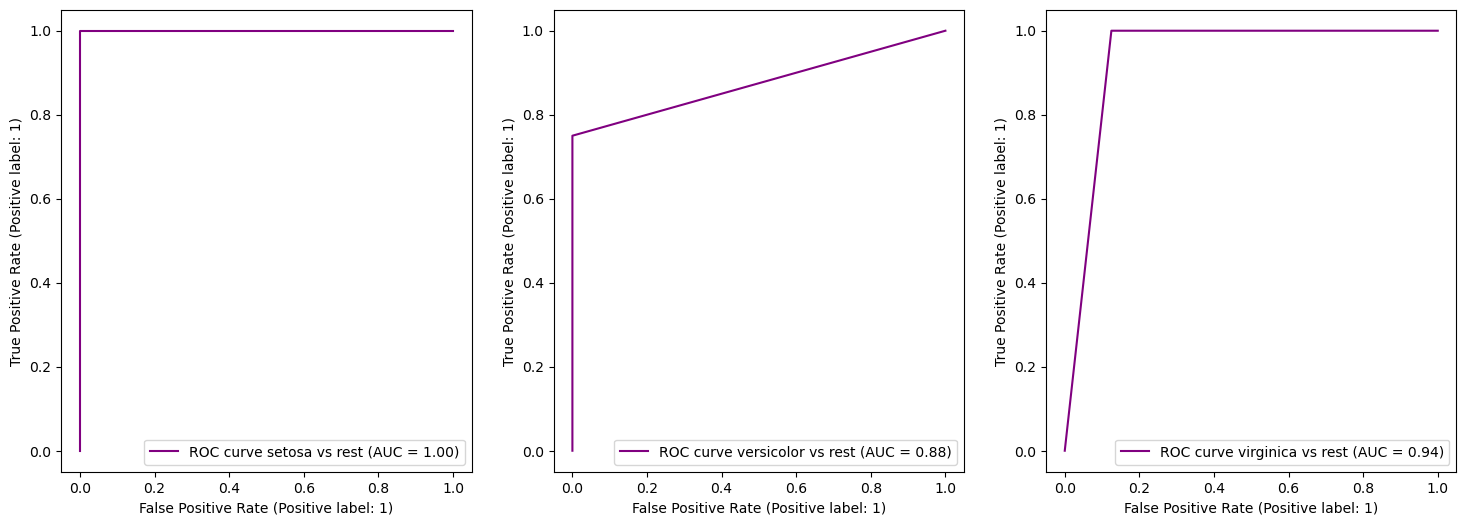

In [36]:
roc_plots(clf_best)